#**KOMPARASI MODEL KLASIFIKASI PRODUK BERDASARKAN DISTRIBUTION CENTER MENGGUNAKAN METODE DECISION TREE DAN RANDOM FOREST**

#**IMPORTING LIBRARY**




In [ ]:
import math 
from collections import Counter, defaultdict 
from functools import partial

import graphviz 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
plt.style.use("fivethirtyeight")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**IMPORTING FILE**

In [ ]:
dfprod=pd.read_csv('/content/drive/MyDrive/FINAL PROJECT RG 210/dept_product/inv_distribution_center_distinct.csv')

In [ ]:
dfprod

product_id       cost product_category  \
0               1  27.048000      Tops & Tees   
1               2  36.626500      Tops & Tees   
2               3  41.005000      Tops & Tees   
3               4  57.132000      Tops & Tees   
4               5  52.358000      Tops & Tees   
...           ...        ...              ...   
29045       29116  36.023041      Accessories   
29046       29117  40.392000      Accessories   
29047       29118  38.720000      Accessories   
29048       29119  19.416419      Accessories   
29049       29120  29.484000      Accessories   

                                           product_name       product_brand  \
0          Seven7 Women's Long Sleeve Stripe Belted Top              Seven7   
1        Calvin Klein Women's MSY Crew Neck Roll Sleeve        Calvin Klein   
2        Calvin Klein Jeans Women's Solid Flyaway Shirt  Calvin Klein Jeans   
3                        Bailey 44 Women's Undertow Top           Bailey 44   
4      Anne Klein Women's Plus-Size Button Front Blouse          Anne Klein   
...                                                 ...                 ...   
29045  Ray-Ban RB 3217 Sunglasses- All Colors And SIZES             Ray-Ban   
29046                  Tumi Monaco Slim Single Billfold                TUMI   
29047                Spy Optic Dirty Mo Wrap Sunglasses                 SPY   
29048            Tumi Men's Alpha Gusseted Id Card Case                TUMI   
29049                      Boconi Collins Calf Billfold              Boconi   

       product_retail_price product_department  \
0                 49.000000              Women   
1                 69.500000              Women   
2                 69.500000              Women   
3                108.000000              Women   
4                 94.000000              Women   
...                     ...                ...   
29045            101.760002                Men   
29046            108.000000                Men   
29047            110.000000                Men   
29048             48.419998                Men   
29049             78.000000                Men   

                                              name  
0                                       Memphis TN  
1                                       Houston TX  
2                                        Mobile AL  
3      Port Authority of New York/New Jersey NY/NJ  
4                                       Chicago IL  
...                                            ...  
29045                                   Chicago IL  
29046                                   Chicago IL  
29047                                  Savannah GA  
29048                                   Chicago IL  
29049                               New Orleans LA  

[29050 rows x 8 columns]

drop tabel yang tidak mengandung value dan tidak dibutuhkan untuk klasifikasi

In [ ]:
del dfprod['product_id']
del dfprod['product_brand']
del dfprod['product_name']

#**DATA INFO**

In [ ]:
dfprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29050 entries, 0 to 29049
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cost                  29050 non-null  float64
 1   product_category      29050 non-null  object 
 2   product_retail_price  29050 non-null  float64
 3   product_department    29050 non-null  object 
 4   name                  29050 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


Total data: 29050 baris

#**HANDLING MISSING VALUE**

In [ ]:
dfprod.isna().sum()

cost                    0
product_category        0
product_retail_price    0
product_department      0
name                    0
dtype: int64

Tidak terdapat missing value

#**HANDLING OUTLIER**

Pemisahan data numerical (int dan float) dan categorical (object)

In [ ]:
numerical=dfprod.select_dtypes(include='number').columns.tolist()
categorical=dfprod.select_dtypes(include='object').columns.tolist()
print(numerical)
print(categorical)

['cost', 'product_retail_price']
['product_category', 'product_department', 'name']


Box Plot guna melihat outlier pada data numerical

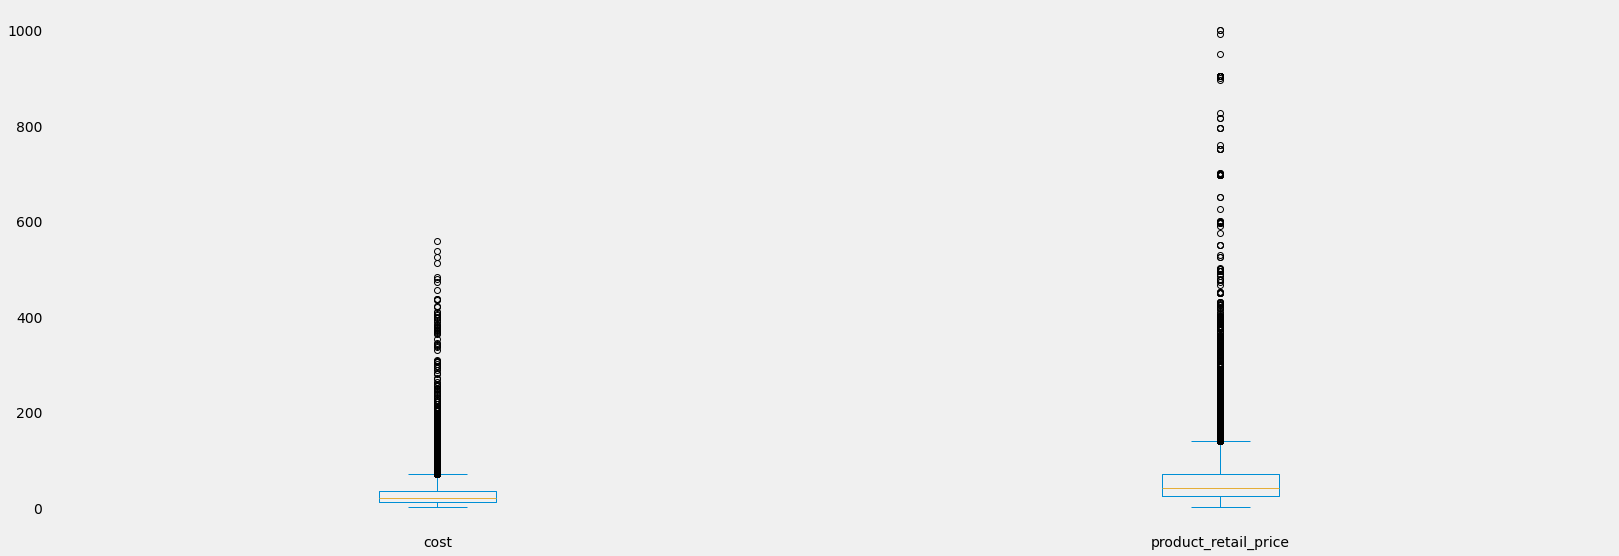

In [ ]:
dfprod[numerical].plot(kind='box',figsize=(25,9))
plt.grid(False)
plt.show()

Terdapat outlier pada kolom cost dan product_retail_price

Statistik Deskriptif data numerical sebelum handling outlier

In [ ]:
dfprod[numerical].describe().T

count       mean        std     min        25%  \
cost                  29050.0  28.487924  30.634961  0.0083  11.280015   
product_retail_price  29050.0  59.231255  65.909108  0.0200  24.000000   

                            50%        75%         max  
cost                  19.683720  34.440833  557.151002  
product_retail_price  39.990002  69.949997  999.000000

Handling outlier menggunakan metode IQR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


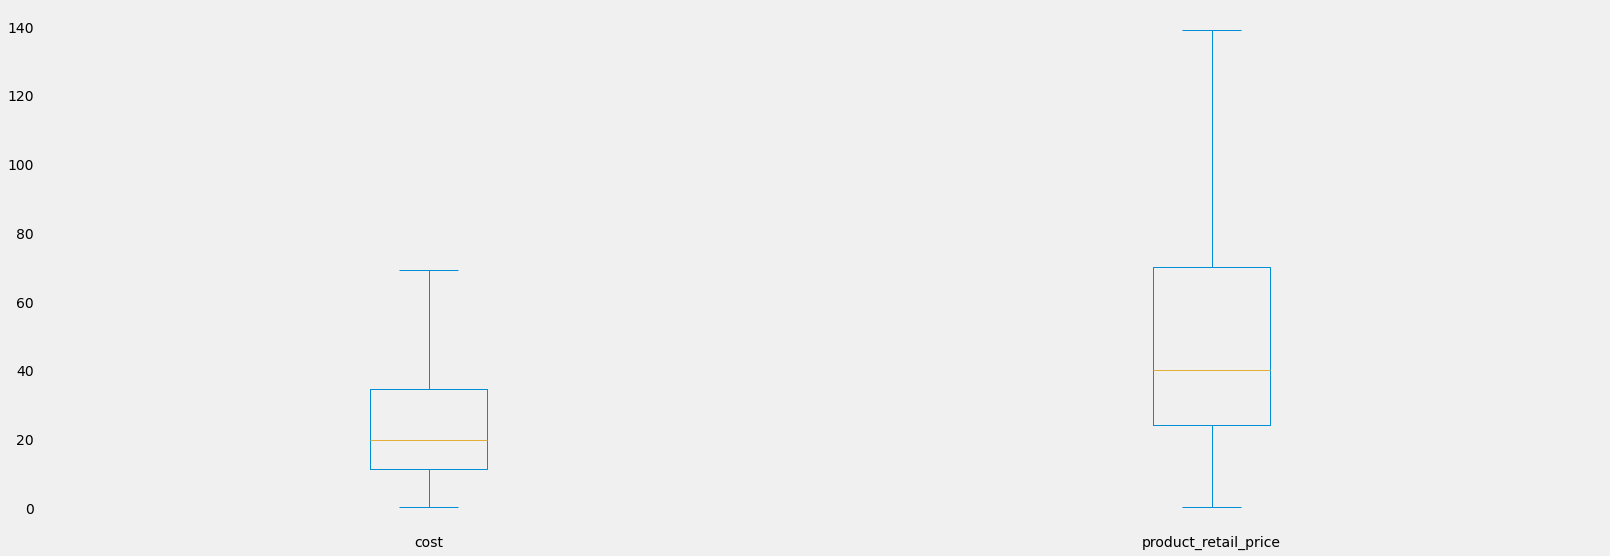

In [ ]:
q1=dfprod[['cost','product_retail_price']].quantile(0.25)
q3=dfprod[['cost','product_retail_price']].quantile(0.75)
IQR=q3-q1
max=q3+1.5*IQR
min=q1-1.5*IQR
dfprod=dfprod.mask(dfprod>max,max,axis=1)
dfprod=dfprod.mask(dfprod<min,min,axis=1)
dfprod[numerical].plot(kind='box',figsize=(25,9))
plt.grid(False)
plt.show()

Sudah tidak terdapat outlier pada data

Statistik Deskriptif data numerical setelah handling outlier

In [ ]:
dfprod[numerical].describe().T

count       mean        std     min        25%  \
cost                  29050.0  25.588522  18.948559  0.0083  11.280015   
product_retail_price  29050.0  52.427725  38.668750  0.0200  24.000000   

                            50%        75%         max  
cost                  19.683720  34.440833   69.182059  
product_retail_price  39.990002  69.949997  138.874992

Statistik Deskriptif data categorical

In [ ]:
dfprod[categorical].describe().T

count unique         top   freq
product_category    29050     26   Intimates   2356
product_department  29050      2       Women  15929
name                29050     10  Chicago IL   3920

#**EXPLORATORY DATA ANALYSIS**

Heatmap untuk mengetahui korelasi antar kolom data numerical

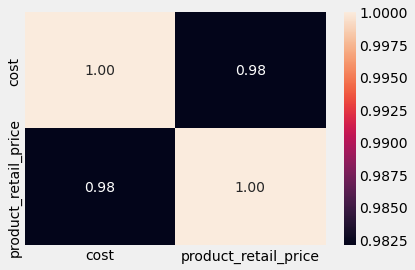

In [ ]:
sns.heatmap(dfprod.corr(),annot=True,fmt='.2f')
plt.show()

Terdapat korelasi tinggi antara cost dan product_retail_price (0.98)

Jumlah tiap product category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


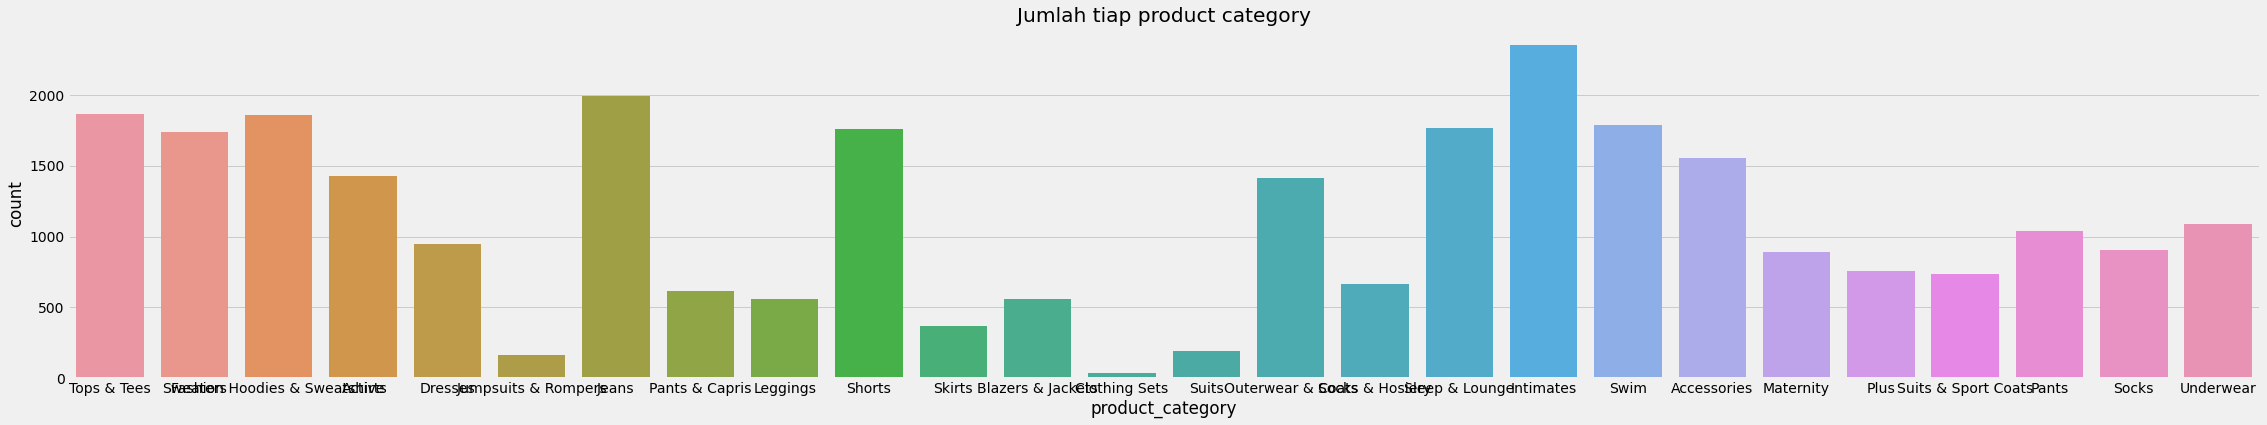

In [ ]:
plt.figure(figsize=(35,6))
sns.countplot('product_category',data=dfprod)
plt.title('Jumlah tiap product category')
plt.show()

Jumlah terbanyak pada kategori intimates

Jumlah tiap product department

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


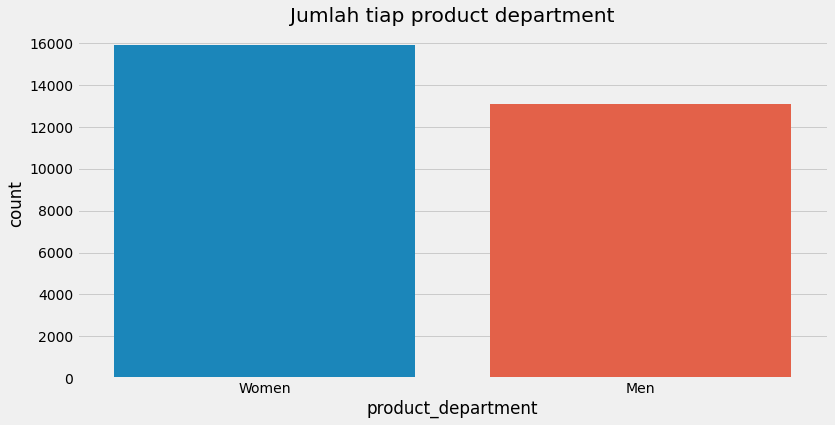

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot('product_department',data=dfprod)
plt.title('Jumlah tiap product department')
plt.show()

Product department men lebih banyak dari women

Jumlah tiap produk pada tiap product distribution center

In [ ]:
plt.figure(figsize=(25,6))
sns.countplot('name',data=dfprod)
plt.title('Jumlah tiap produk pada tiap product distribution center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Produk terbanyak didistribusikan dari Memphis TN

Jumlah tiap product department pada tiap product category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


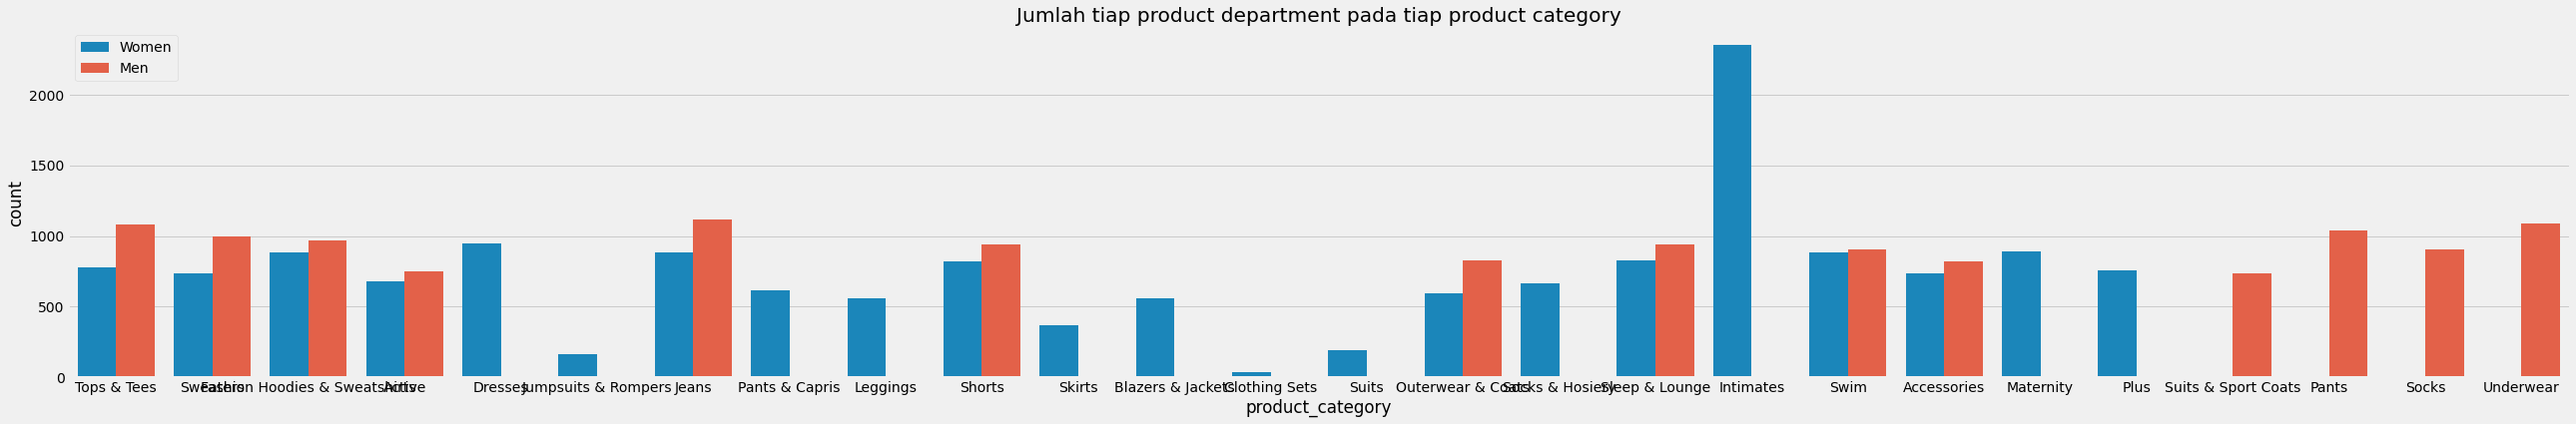

In [ ]:
plt.figure(figsize=(40,6))
sns.countplot('product_category',data=dfprod,hue='product_department')
plt.title('Jumlah tiap product department pada tiap product category')
plt.legend(loc='best')
plt.show()

Jumlah tiap produk pada tiap distribution center tiap product category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


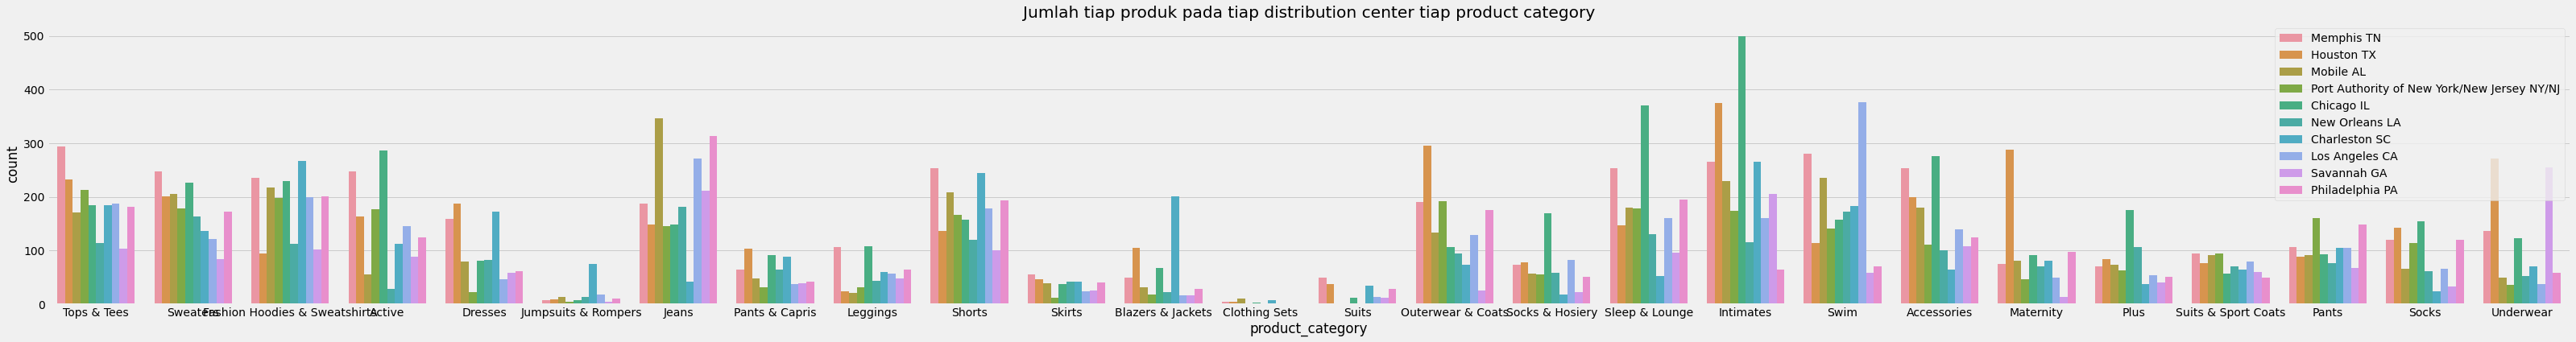

In [ ]:
plt.figure(figsize=(50,6))
sns.countplot('product_category',data=dfprod,hue='name')
plt.title('Jumlah tiap produk pada tiap distribution center tiap product category')
plt.legend(loc='best')
plt.show()

#**MODEL DEVELOPMENT**

##**IMPORT LIBRARY**

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score, \
                            recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

##**SPLITTING DATASET**

splitting result variable

In [ ]:
x=dfprod.drop(columns=['name']).copy()
y=dfprod['name'].copy()

memisahkan ke train, development, test (60:30:10)

In [ ]:
xtrain,xrest,ytrain,yrest=train_test_split(x,y,test_size=.4,stratify=y,random_state=11)
xdev,xtest,ydev,ytest=train_test_split(xrest,yrest,test_size=.25,stratify=yrest,random_state=11)

print(f'training size: {xtrain.shape[0]} ({100*xtrain.shape[0]/x.shape[0]:.2f}%)')
print(f'dev size: {xdev.shape[0]} ({100*xdev.shape[0]/x.shape[0]:.2f}%)')
print(f'test size: {xtest.shape[0]} ({100*xtest.shape[0]/x.shape[0]:.2f}%)')

training size: 17430 (60.00%)
dev size: 8715 (30.00%)
test size: 2905 (10.00%)


visualisasi data train,dev,test

In [ ]:
fig,axis=plt.subplots(1,3,figsize=(50,6))
for i,label in enumerate([(ytrain,'train'),(ydev,'dev'),(ytest,'test')]):
  sns.countplot(x=label[0],ax=axis[i])
  axis[i].set_title(label[1])
plt.show()

In [ ]:
nomfeat=['product_department']
orfeat=x.select_dtypes(include='object').drop(columns=nomfeat).columns.tolist()
print(nomfeat)
print(orfeat)

['product_department']
['product_category']


##**HANDLE IMBALANCED DATA IN DATA TRAINING**

Asumsi: handle imbalanced data menggunakan oversampling

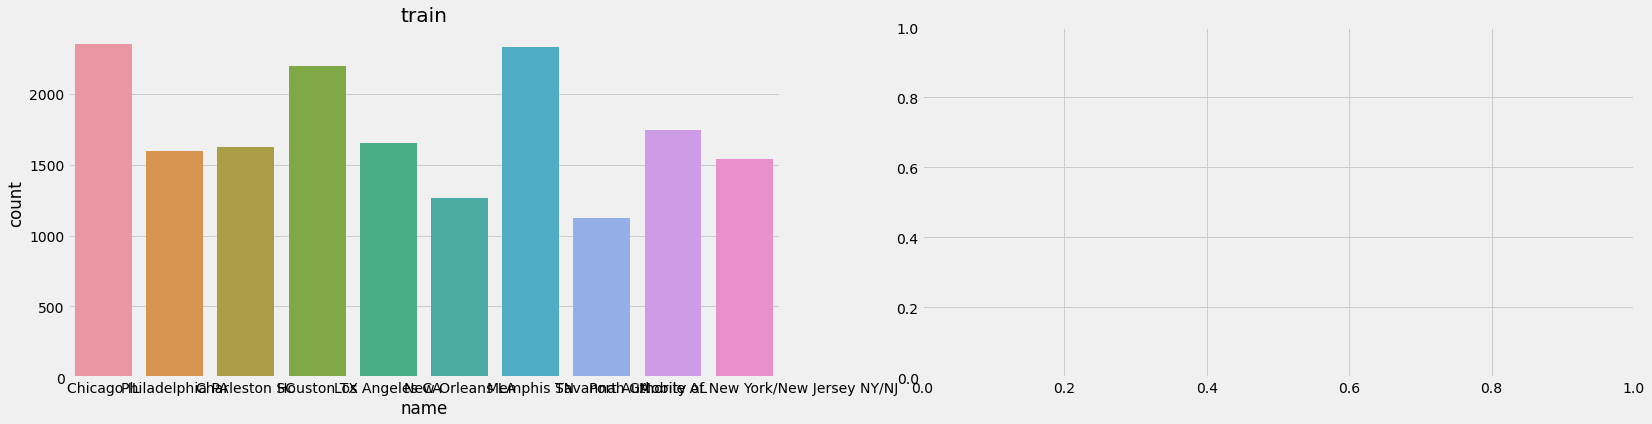

In [ ]:
fig,axis=plt.subplots(1,2,figsize=(25,6))
for i,label in enumerate([(ytrain,'train')]):
  sns.countplot(x=label[0],ax=axis[i])
  axis[i].set_title(label[1])
plt.show()

In [ ]:
print("Before handle imbalance data: ", Counter(ytrain))

Before handle imbalance data:  Counter({'Chicago IL': 2352, 'Memphis TN': 2329, 'Houston TX': 2194, 'Mobile AL': 1748, 'Los Angeles CA': 1652, 'Charleston SC': 1626, 'Philadelphia PA': 1599, 'Port Authority of New York/New Jersey NY/NJ': 1540, 'New Orleans LA': 1263, 'Savannah GA': 1127})


oversampling menggunakan RandomOverSampler. Hyperparameter:
*   sampling strategy (menentukan strategi sampling): not majority

In [ ]:
oversample=RandomOverSampler(sampling_strategy='not majority')

In [ ]:
xtrain_ov,ytrain_ov=oversample.fit_resample(xtrain,ytrain)

In [ ]:
fig,axis=plt.subplots(1,2,figsize=(25,6))
for i,label in enumerate([(ytrain_ov,'train data oversampled')]):
  sns.countplot(x=label[0],ax=axis[i])
  axis[i].set_title(label[1])
plt.show()

In [ ]:
print("After oversampling: ", Counter(ytrain_ov))

After oversampling:  Counter({'Chicago IL': 2352, 'Philadelphia PA': 2352, 'Charleston SC': 2352, 'Houston TX': 2352, 'Los Angeles CA': 2352, 'New Orleans LA': 2352, 'Memphis TN': 2352, 'Savannah GA': 2352, 'Mobile AL': 2352, 'Port Authority of New York/New Jersey NY/NJ': 2352})


##**MODEL DEVELOPMENT: DECISION TREE**

###**MODEL DEVELOPMENT**

Categorical data encoding:
- nominal feature ==> one hot encoder
- ordinal feature ==> ordinal encoder

In [ ]:
onehot=OneHotEncoder()
onehot.fit(xtrain_ov[nomfeat])
xtrain_oh=pd.DataFrame(onehot.transform(xtrain_ov[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
xdev_oh=pd.DataFrame(onehot.transform(xdev[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
xtest_oh=pd.DataFrame(onehot.transform(xtest[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
display(xtrain_oh)

ordinal=OrdinalEncoder()
ordinal.fit(xtrain_ov[orfeat])
xtrain_or=pd.DataFrame(ordinal.transform(xtrain_ov[orfeat]),columns=ordinal.feature_names_in_)
xdev_or=pd.DataFrame(ordinal.transform(xdev[orfeat]),columns=ordinal.feature_names_in_)
xtest_or=pd.DataFrame(ordinal.transform(xtest[orfeat]),columns=ordinal.feature_names_in_)
display(xtrain_or)

product_department_Men  product_department_Women
0                         0.0                       1.0
1                         0.0                       1.0
2                         0.0                       1.0
3                         0.0                       1.0
4                         1.0                       0.0
...                       ...                       ...
23515                     1.0                       0.0
23516                     0.0                       1.0
23517                     1.0                       0.0
23518                     1.0                       0.0
23519                     0.0                       1.0

[23520 rows x 2 columns]

product_category
0                   4.0
1                   0.0
2                   0.0
3                   1.0
4                  23.0
...                 ...
23515              22.0
23516               7.0
23517              21.0
23518               0.0
23519              24.0

[23520 rows x 1 columns]

Menggabungkan dengan numerical data

In [ ]:
xtrain_comb=pd.concat([xtrain_ov[numerical].reset_index(drop=True),xtrain_oh,xtrain_or],axis=1)
xdev_comb=pd.concat([xdev[numerical].reset_index(drop=True),xdev_oh,xdev_or],axis=1)
xtest_comb=pd.concat([xtest[numerical].reset_index(drop=True),xtest_oh,xtest_or],axis=1)
xtrain_comb.head()

cost  product_retail_price  product_department_Men  \
0  30.124000             68.000000                     0.0   
1  33.505141             87.940002                     0.0   
2   8.295000             21.000000                     0.0   
3  11.143500             25.500000                     0.0   
4  34.910241             58.970001                     1.0   

   product_department_Women  product_category  
0                       1.0               4.0  
1                       1.0               0.0  
2                       1.0               0.0  
3                       1.0               1.0  
4                       0.0              23.0

Rescaling data menggunakan standard scaler

In [ ]:
scaler=StandardScaler()
scaler.fit(xtrain_comb)

xtrain_scal=pd.DataFrame(scaler.transform(xtrain_comb),columns=xtrain_comb.columns)
xdev_scal=pd.DataFrame(scaler.transform(xdev_comb),columns=xdev_comb.columns)
xtest_scal=pd.DataFrame(scaler.transform(xtest_comb),columns=xtest_comb.columns)
xtrain_scal.head()

cost  product_retail_price  product_department_Men  \
0  0.232003              0.397335               -0.932144   
1  0.408907              0.909510               -0.932144   
2 -0.910108             -0.809898               -0.932144   
3 -0.761072             -0.694312               -0.932144   
4  0.482423              0.165392                1.072796   

   product_department_Women  product_category  
0                  0.932144         -1.109340  
1                  0.932144         -1.618354  
2                  0.932144         -1.618354  
3                  0.932144         -1.491100  
4                 -1.072796          1.308477

modelling with decision tree. Hyperparameter:
- criterion (to measure the quality of split): entropy
- max_features (number of features to consider when looking for the best split): auto
- min_samples_leaf (minimum number of samples required to be at a leaf node): 2
- random_state (randomness of estimator): 19

In [ ]:
model1=DecisionTreeClassifier(criterion='entropy', max_features='auto',  min_samples_leaf=2, random_state=19)

In [ ]:
model1.fit(xtrain_scal,ytrain_ov)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=2, random_state=19)

In [ ]:
pred_train1=model1.predict(xtrain_scal)
pred_dev1=model1.predict(xdev_scal)
pred_test1=model1.predict(xtest_scal)

###**MODEL EVALUATION**

In [ ]:
print(classification_report(ytrain_ov,pred_train1))

                                             precision    recall  f1-score   support

                              Charleston SC       0.73      0.90      0.81      2352
                                 Chicago IL       0.59      0.70      0.64      2352
                                 Houston TX       0.58      0.70      0.64      2352
                             Los Angeles CA       0.74      0.75      0.74      2352
                                 Memphis TN       0.68      0.53      0.60      2352
                                  Mobile AL       0.78      0.62      0.69      2352
                             New Orleans LA       0.79      0.80      0.79      2352
                            Philadelphia PA       0.74      0.70      0.72      2352
Port Authority of New York/New Jersey NY/NJ       0.83      0.65      0.73      2352
                                Savannah GA       0.78      0.83      0.81      2352

                                   accuracy                    

Insight dari decision tree evaluation (data train):
- accuracy: 72%
- precision: 58% - 83%
- recall: 53% - 90%
- f1 score: 60% - 81%

In [ ]:
ConfusionMatrixDisplay.from_predictions(ytrain_ov, pred_train1)
plt.title("Train Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
print(classification_report(ydev,pred_dev1))

                                             precision    recall  f1-score   support

                              Charleston SC       0.32      0.42      0.37       813
                                 Chicago IL       0.24      0.28      0.26      1176
                                 Houston TX       0.24      0.28      0.26      1097
                             Los Angeles CA       0.21      0.21      0.21       826
                                 Memphis TN       0.20      0.15      0.17      1164
                                  Mobile AL       0.17      0.14      0.15       875
                             New Orleans LA       0.20      0.24      0.22       631
                            Philadelphia PA       0.21      0.17      0.19       800
Port Authority of New York/New Jersey NY/NJ       0.16      0.11      0.13       770
                                Savannah GA       0.18      0.21      0.19       563

                                   accuracy                    

Insight dari decision tree evaluation (data dev):
- accuracy: 22%
- precision: 16% - 32%
- recall: 14% - 42%
- f1 score: 13% - 37%

In [ ]:
ConfusionMatrixDisplay.from_predictions(ydev, pred_dev1)
plt.title("Dev Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
print(classification_report(ytest,pred_test1))

                                             precision    recall  f1-score   support

                              Charleston SC       0.30      0.40      0.35       271
                                 Chicago IL       0.24      0.27      0.25       392
                                 Houston TX       0.26      0.30      0.28       365
                             Los Angeles CA       0.22      0.23      0.22       276
                                 Memphis TN       0.18      0.14      0.16       388
                                  Mobile AL       0.18      0.14      0.16       291
                             New Orleans LA       0.18      0.20      0.19       211
                            Philadelphia PA       0.22      0.21      0.22       266
Port Authority of New York/New Jersey NY/NJ       0.16      0.11      0.13       257
                                Savannah GA       0.17      0.18      0.17       188

                                   accuracy                    

Insight dari decision tree evaluation (data test):
- accuracy: 22%
- precision: 16% - 30%
- recall: 11% - 40%
- f1 score: 13% - 35%

In [ ]:
ConfusionMatrixDisplay.from_predictions(ytest, pred_test1)
plt.title("Test Confusion Matrix")
plt.grid(False)
plt.show()

###**MODEL VISUALIZATION**

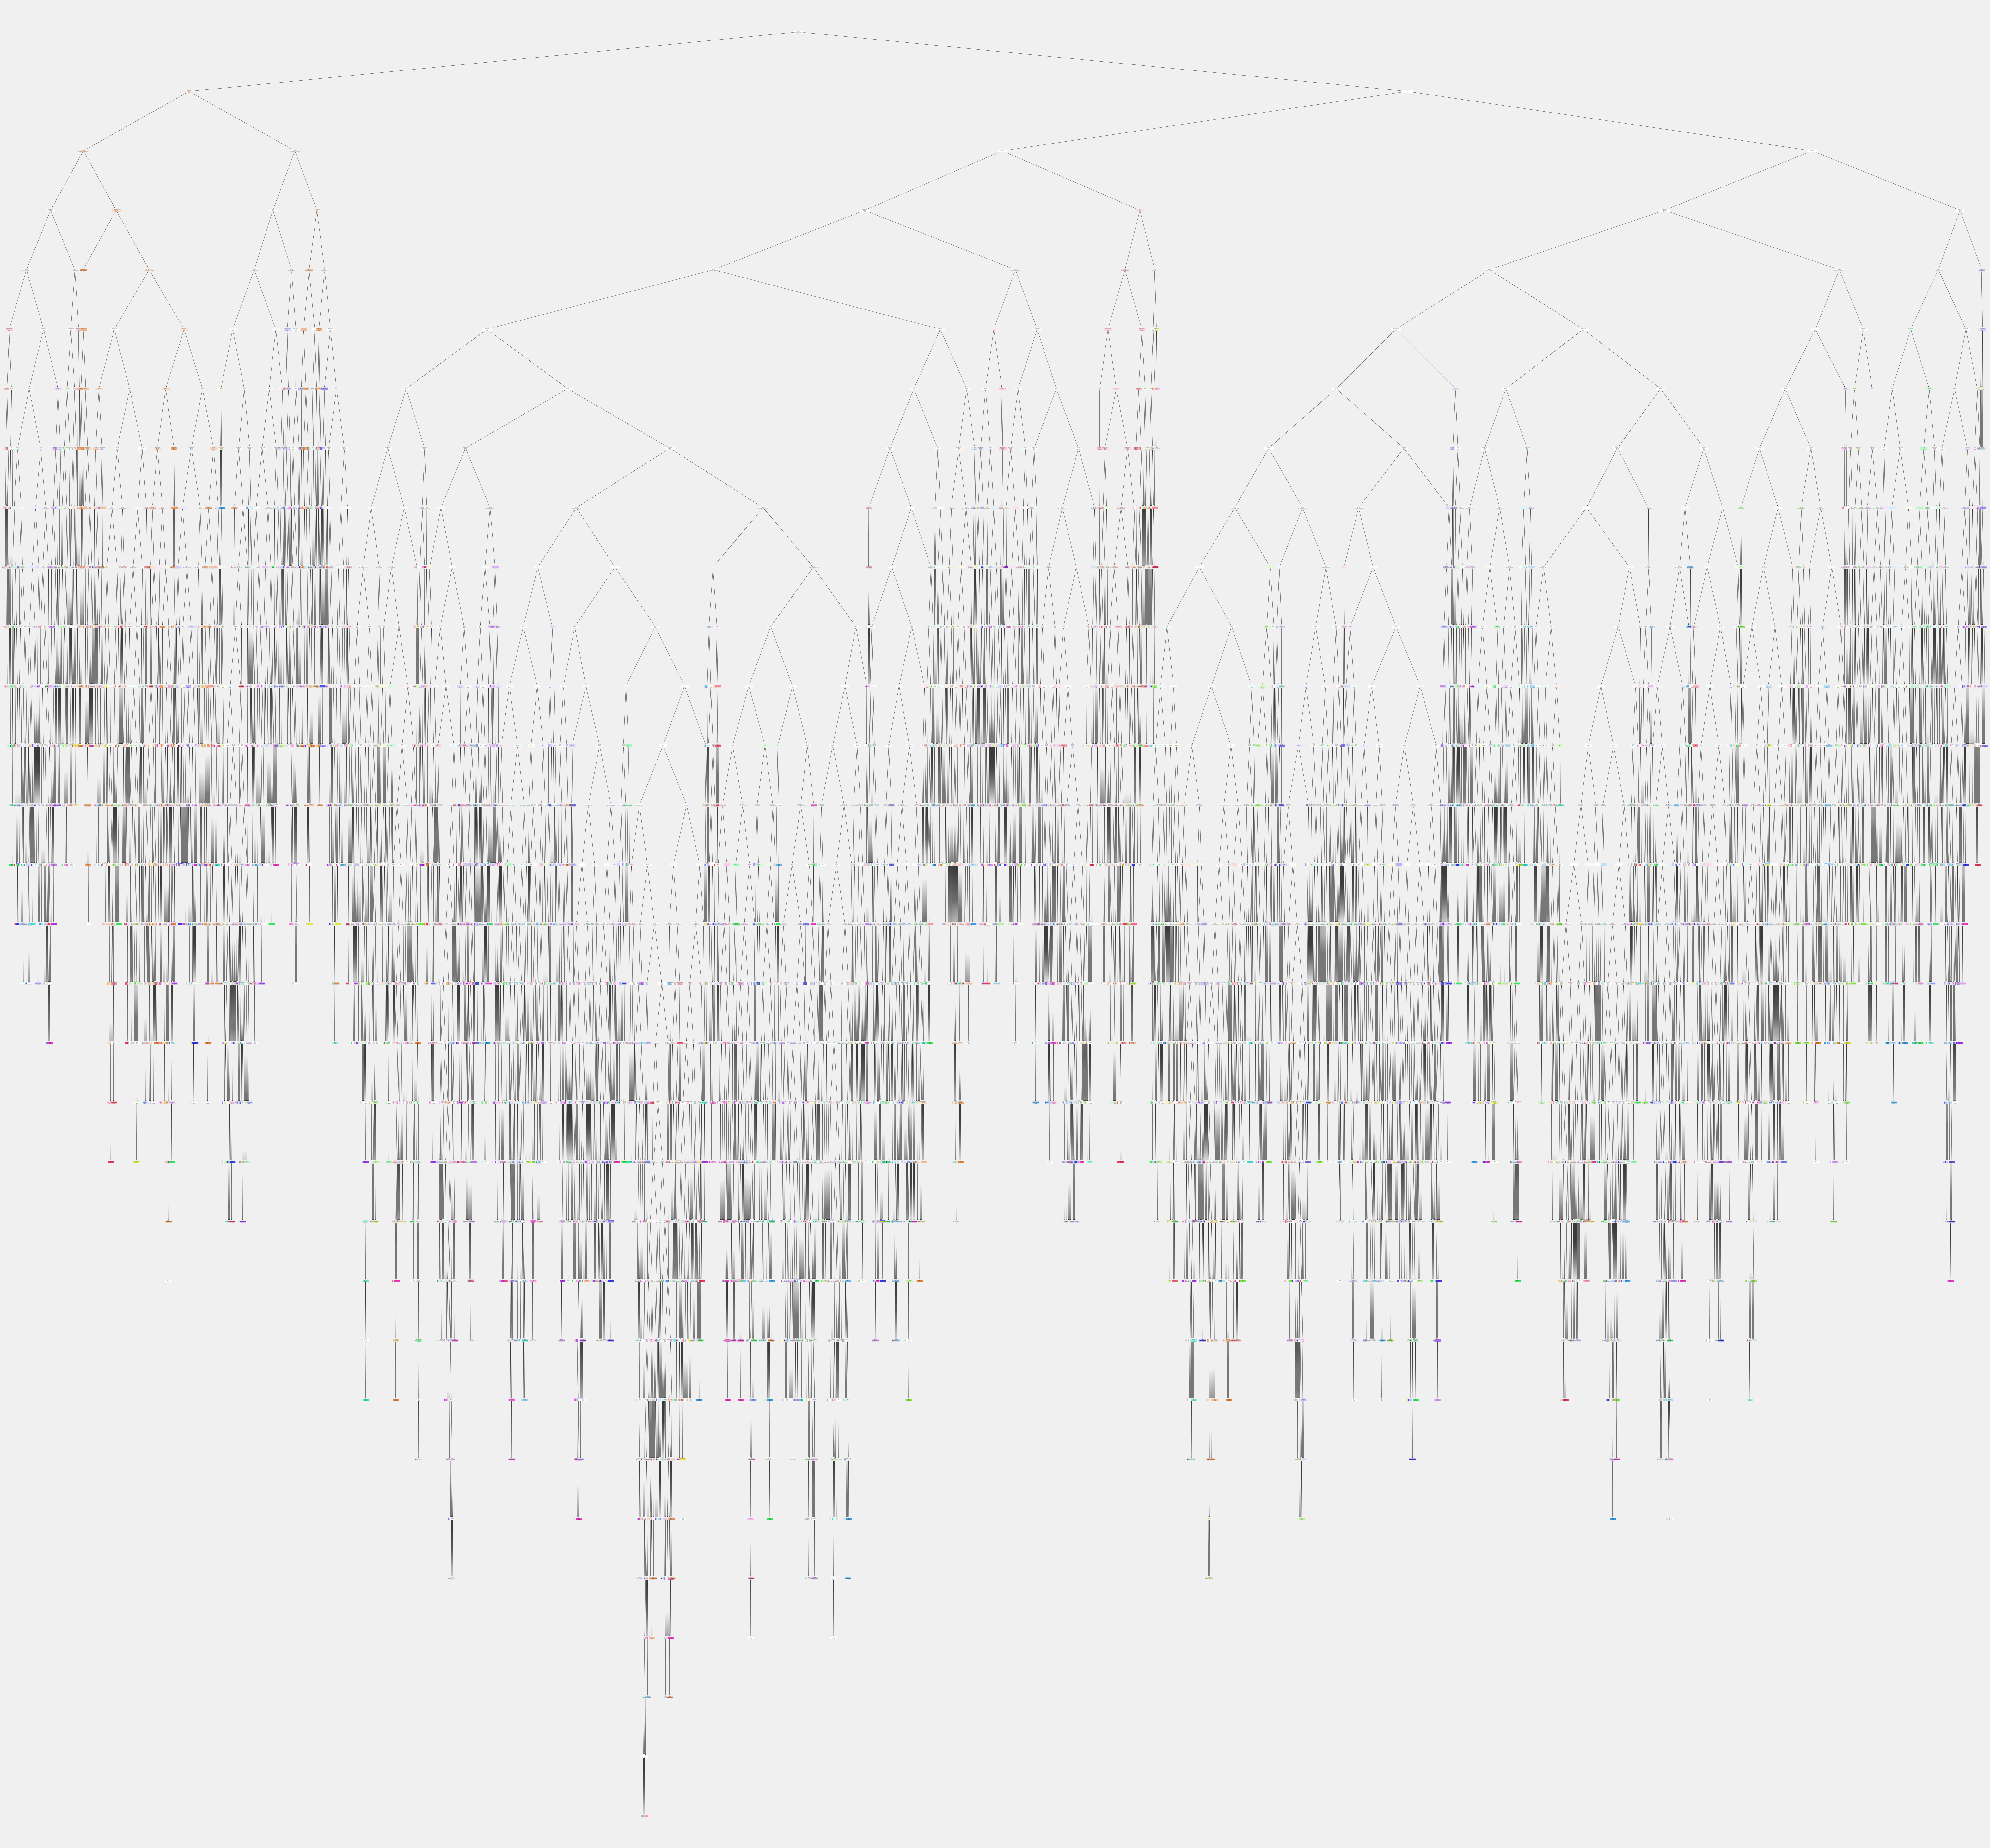

In [ ]:
plt.figure(figsize=(100, 100))
plot_tree(
    model1,
    feature_names=model1.feature_names_in_,
    class_names=True,
    filled=True,
)
plt.show()

In [ ]:
colnames=(numerical+onehot.get_feature_names_out().tolist()+ordinal.feature_names_in_.tolist())
xprocessed1=pd.concat([x[numerical].reset_index(drop=True),
                      pd.DataFrame(onehot.transform(x[nomfeat]).toarray(),columns=onehot.get_feature_names_out().tolist()),
                      pd.DataFrame(ordinal.transform(x[orfeat]),columns=ordinal.feature_names_in_.tolist()),
                      ],axis=1)
xprocessed_scaled1=pd.DataFrame(scaler.transform(xprocessed1),columns=xprocessed1.columns)
predfull1=model1.predict(xprocessed_scaled1)
xfinal1=x.assign(prediction=predfull1)
xfinal1.head()

cost product_category  product_retail_price product_department  \
0  27.0480      Tops & Tees                  49.0              Women   
1  36.6265      Tops & Tees                  69.5              Women   
2  41.0050      Tops & Tees                  69.5              Women   
3  57.1320      Tops & Tees                 108.0              Women   
4  52.3580      Tops & Tees                  94.0              Women   

                                    prediction  
0                               New Orleans LA  
1                                   Houston TX  
2                              Philadelphia PA  
3  Port Authority of New York/New Jersey NY/NJ  
4                                   Chicago IL

##**MODEL DEVELOPMENT: RANDOM FOREST**

###**MODEL DEVELOPMENT**

modelling with random forest. Hyperparameter:
- criterion (to measure the quality of split): entropy
- max_features (number of features to consider when looking for the best split): sqrt
- min_samples_leaf (minimum number of samples required to be at a leaf node): 2
- random_state (randomness of estimator): 19

In [ ]:
model2=RandomForestClassifier(criterion='entropy', max_features='sqrt',  min_samples_leaf=2, random_state=19)

In [ ]:
model2.fit(xtrain_scal,ytrain_ov)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=2, random_state=19)

In [ ]:
pred_train2=model2.predict(xtrain_scal)
pred_dev2=model2.predict(xdev_scal)
pred_test2=model2.predict(xtest_scal)

###**MODEL EVALUATION**

In [ ]:
print(classification_report(ytrain_ov,pred_train2))

                                             precision    recall  f1-score   support

                              Charleston SC       0.88      0.91      0.89      2352
                                 Chicago IL       0.86      0.77      0.81      2352
                                 Houston TX       0.75      0.81      0.78      2352
                             Los Angeles CA       0.87      0.86      0.86      2352
                                 Memphis TN       0.88      0.75      0.81      2352
                                  Mobile AL       0.89      0.80      0.84      2352
                             New Orleans LA       0.82      0.90      0.86      2352
                            Philadelphia PA       0.83      0.87      0.85      2352
Port Authority of New York/New Jersey NY/NJ       0.88      0.85      0.87      2352
                                Savannah GA       0.82      0.92      0.87      2352

                                   accuracy                    

Insight dari random forest evaluation (data train):
- accuracy: 84%
- precision: 75% - 89%
- recall: 75% - 92%
- f1 score: 81% - 89%

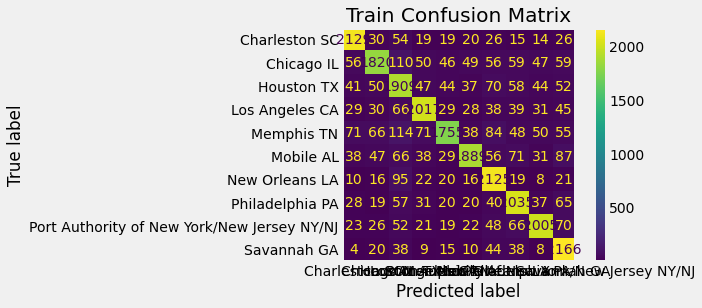

In [ ]:
ConfusionMatrixDisplay.from_predictions(ytrain_ov, pred_train2)
plt.title("Train Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
print(classification_report(ydev,pred_dev2))

                                             precision    recall  f1-score   support

                              Charleston SC       0.42      0.45      0.43       813
                                 Chicago IL       0.29      0.24      0.26      1176
                                 Houston TX       0.30      0.31      0.31      1097
                             Los Angeles CA       0.24      0.22      0.23       826
                                 Memphis TN       0.24      0.20      0.22      1164
                                  Mobile AL       0.23      0.21      0.22       875
                             New Orleans LA       0.21      0.30      0.25       631
                            Philadelphia PA       0.27      0.27      0.27       800
Port Authority of New York/New Jersey NY/NJ       0.16      0.15      0.16       770
                                Savannah GA       0.20      0.26      0.23       563

                                   accuracy                    

Insight dari random forest evaluation (data dev):
- accuracy: 26%
- precision: 16% - 42%
- recall: 15% - 45%
- f1 score: 16% - 43%

In [ ]:
ConfusionMatrixDisplay.from_predictions(ydev, pred_dev2)
plt.title("Dev Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
print(classification_report(ytest,pred_test2))

                                             precision    recall  f1-score   support

                              Charleston SC       0.39      0.44      0.41       271
                                 Chicago IL       0.30      0.24      0.27       392
                                 Houston TX       0.30      0.29      0.30       365
                             Los Angeles CA       0.25      0.26      0.26       276
                                 Memphis TN       0.24      0.18      0.20       388
                                  Mobile AL       0.20      0.19      0.19       291
                             New Orleans LA       0.20      0.28      0.24       211
                            Philadelphia PA       0.28      0.30      0.29       266
Port Authority of New York/New Jersey NY/NJ       0.15      0.15      0.15       257
                                Savannah GA       0.18      0.22      0.20       188

                                   accuracy                    

Insight dari random forest evaluation (data test):
- accuracy: 26%
- precision: 15% - 39%
- recall: 15% - 44%
- f1 score: 15% - 41%

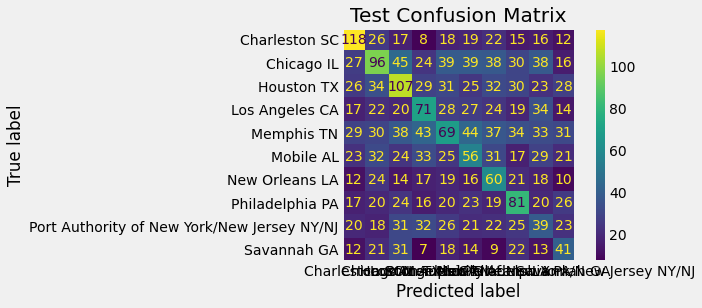

In [ ]:
ConfusionMatrixDisplay.from_predictions(ytest, pred_test2)
plt.title("Test Confusion Matrix")
plt.grid(False)
plt.show()

###**MODEL VISUALIZATIONS**

In [ ]:
colnames=(numerical+onehot.get_feature_names_out().tolist()+ordinal.feature_names_in_.tolist())
xprocessed2=pd.concat([x[numerical].reset_index(drop=True),
                      pd.DataFrame(onehot.transform(x[nomfeat]).toarray(),columns=onehot.get_feature_names_out().tolist()),
                      pd.DataFrame(ordinal.transform(x[orfeat]),columns=ordinal.feature_names_in_.tolist()),
                      ],axis=1)
xprocessed_scaled2=pd.DataFrame(scaler.transform(xprocessed2),columns=xprocessed2.columns)
predfull2=model2.predict(xprocessed_scaled2)
xfinal2=x.assign(prediction=predfull2)
xfinal2.head()

cost product_category  product_retail_price product_department  \
0  27.0480      Tops & Tees                  49.0              Women   
1  36.6265      Tops & Tees                  69.5              Women   
2  41.0050      Tops & Tees                  69.5              Women   
3  57.1320      Tops & Tees                 108.0              Women   
4  52.3580      Tops & Tees                  94.0              Women   

                                    prediction  
0                               New Orleans LA  
1                                   Houston TX  
2                                    Mobile AL  
3  Port Authority of New York/New Jersey NY/NJ  
4                                   Chicago IL

##**PERBANDINGAN MODEL DAN KESIMPULAN**

###**DATA TRAIN**

In [ ]:
print('Classification Report Decision Tree')
print(classification_report(ytrain_ov,pred_train1))

Classification Report Decision Tree
                                             precision    recall  f1-score   support

                              Charleston SC       0.73      0.90      0.81      2352
                                 Chicago IL       0.59      0.70      0.64      2352
                                 Houston TX       0.58      0.70      0.64      2352
                             Los Angeles CA       0.74      0.75      0.74      2352
                                 Memphis TN       0.68      0.53      0.60      2352
                                  Mobile AL       0.78      0.62      0.69      2352
                             New Orleans LA       0.79      0.80      0.79      2352
                            Philadelphia PA       0.74      0.70      0.72      2352
Port Authority of New York/New Jersey NY/NJ       0.83      0.65      0.73      2352
                                Savannah GA       0.78      0.83      0.81      2352

                           

In [ ]:
print('Classification Report Random Forest')
print(classification_report(ytrain_ov,pred_train2))

Classification Report Random Forest
                                             precision    recall  f1-score   support

                              Charleston SC       0.88      0.91      0.89      2352
                                 Chicago IL       0.86      0.77      0.81      2352
                                 Houston TX       0.75      0.81      0.78      2352
                             Los Angeles CA       0.87      0.86      0.86      2352
                                 Memphis TN       0.88      0.75      0.81      2352
                                  Mobile AL       0.89      0.80      0.84      2352
                             New Orleans LA       0.82      0.90      0.86      2352
                            Philadelphia PA       0.83      0.87      0.85      2352
Port Authority of New York/New Jersey NY/NJ       0.88      0.85      0.87      2352
                                Savannah GA       0.82      0.92      0.87      2352

                           

Dari kedua classification report, dapat dilihat bahwa baik nilai accuracy, precision, recall, dan f1 score dari klasifikasi menggunakan Random Forest lebih baik daripada menggunakan Decision Tree

###**DATA DEV**

In [ ]:
print('Classification Report Decision Tree')
print(classification_report(ydev,pred_dev1))

Classification Report Decision Tree
                                             precision    recall  f1-score   support

                              Charleston SC       0.32      0.42      0.37       813
                                 Chicago IL       0.24      0.28      0.26      1176
                                 Houston TX       0.24      0.28      0.26      1097
                             Los Angeles CA       0.21      0.21      0.21       826
                                 Memphis TN       0.20      0.15      0.17      1164
                                  Mobile AL       0.17      0.14      0.15       875
                             New Orleans LA       0.20      0.24      0.22       631
                            Philadelphia PA       0.21      0.17      0.19       800
Port Authority of New York/New Jersey NY/NJ       0.16      0.11      0.13       770
                                Savannah GA       0.18      0.21      0.19       563

                           

In [ ]:
print('Classification Report Random Forest')
print(classification_report(ydev,pred_dev2))

Classification Report Random Forest
                                             precision    recall  f1-score   support

                              Charleston SC       0.42      0.45      0.43       813
                                 Chicago IL       0.29      0.24      0.26      1176
                                 Houston TX       0.30      0.31      0.31      1097
                             Los Angeles CA       0.24      0.22      0.23       826
                                 Memphis TN       0.24      0.20      0.22      1164
                                  Mobile AL       0.23      0.21      0.22       875
                             New Orleans LA       0.21      0.30      0.25       631
                            Philadelphia PA       0.27      0.27      0.27       800
Port Authority of New York/New Jersey NY/NJ       0.16      0.15      0.16       770
                                Savannah GA       0.20      0.26      0.23       563

                           

Dari kedua Dev Data classification report, dapat dilihat bahwa baik nilai accuracy, precision, recall, dan f1 score dari klasifikasi menggunakan Random Forest lebih baik daripada menggunakan Decision Tree

###**DATA TEST**

In [ ]:
print('Classification Report Decision Tree')
print(classification_report(ytest,pred_test1))

Classification Report Decision Tree
                                             precision    recall  f1-score   support

                              Charleston SC       0.30      0.40      0.35       271
                                 Chicago IL       0.24      0.27      0.25       392
                                 Houston TX       0.26      0.30      0.28       365
                             Los Angeles CA       0.22      0.23      0.22       276
                                 Memphis TN       0.18      0.14      0.16       388
                                  Mobile AL       0.18      0.14      0.16       291
                             New Orleans LA       0.18      0.20      0.19       211
                            Philadelphia PA       0.22      0.21      0.22       266
Port Authority of New York/New Jersey NY/NJ       0.16      0.11      0.13       257
                                Savannah GA       0.17      0.18      0.17       188

                           

In [ ]:
print('Classification Report Random Forest')
print(classification_report(ytest,pred_test2))

Classification Report Random Forest
                                             precision    recall  f1-score   support

                              Charleston SC       0.39      0.44      0.41       271
                                 Chicago IL       0.30      0.24      0.27       392
                                 Houston TX       0.30      0.29      0.30       365
                             Los Angeles CA       0.25      0.26      0.26       276
                                 Memphis TN       0.24      0.18      0.20       388
                                  Mobile AL       0.20      0.19      0.19       291
                             New Orleans LA       0.20      0.28      0.24       211
                            Philadelphia PA       0.28      0.30      0.29       266
Port Authority of New York/New Jersey NY/NJ       0.15      0.15      0.15       257
                                Savannah GA       0.18      0.22      0.20       188

                           

Dari kedua Test Data classification report, dapat dilihat bahwa baik nilai accuracy, precision, recall, dan f1 score dari klasifikasi menggunakan Random Forest lebih baik daripada menggunakan Decision Tree

###**KESIMPULAN**

Dapat disimpulkan bahwa klasifikasi menggunakan metode Random Forest lebih baik daripada Decision Tree karena nilai accuracy, precision, recall, dan f1 score baik pada data train, dev, dan test nya lebih besar

In [ ]:
xfinal2.head()

cost product_category  product_retail_price product_department  \
0  27.0480      Tops & Tees                  49.0              Women   
1  36.6265      Tops & Tees                  69.5              Women   
2  41.0050      Tops & Tees                  69.5              Women   
3  57.1320      Tops & Tees                 108.0              Women   
4  52.3580      Tops & Tees                  94.0              Women   

                                    prediction  
0                               New Orleans LA  
1                                   Houston TX  
2                                    Mobile AL  
3  Port Authority of New York/New Jersey NY/NJ  
4                                   Chicago IL

exporting files

In [ ]:
xfinal2.to_csv('/content/drive/MyDrive/FINAL PROJECT RG 210/dept_product/inv_distribution_center_fina_classificated.csv')